# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [43]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...

## Getting Started
The DataFrame itself and the info was viewed prior to starting the project. As the data in the columns 'wbc' and 'rbc' will not be used in any calculations/tests, no data cleaning was performed on these columns to replace their empty entries. 

In [44]:
print(drug_safety.info())
drug_safety.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB
None


,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


## Question 1: Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called `two_sample_p_value`.
In this test, the null hypothesis is that the proportion of adverse effects do not differ significantly between the Drug and Placebo groups, and the alternative hypothesis is that the proportion of adverse effects do differ significantly between the Drug and Placebo groups. Prior to running the hypothesis test, a significance level of 0.05 was chosen. The number of patients in each treatment group who did and did not experience adverse side-effects were calculated. These numbers were then used to create two arrays: `n_adverse_effects`, which included the number of patients who experienced adverse effects in each group, and `n_group_totals`, which included the total number of patients in each group. The arrays were then plugged into the `proportions_ztest` function, setting the "alternative" arument to "two-sided" to check for any significant differences. The p-value of the test is approximately 0.964 which is greater than the alpha level. The null hypothesis cannot be rejected, and therefore there are no significant differences between the proportions of patients who experienced adverse effects in each group.  

In [45]:
print(drug_safety.groupby('trx')['adverse_effects'].value_counts())

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64


In [46]:
#Setting significance level before calculating the p-value
alpha = 0.05

#Creating an array of the # of ppl who had adverse reactions in each group
n_adverse_effects = np.array([1024, 512])

#Creating an array of the total # of ppl in each group
n_group_totals = np.array([9703 + 1024, 4864 + 512])

#Running proportions_ztest to calculate z-score and p-value
z_score, two_sample_p_value = proportions_ztest(count = n_adverse_effects, 
                                                nobs = n_group_totals,
                                               alternative = 'two-sided')

print(z_score, two_sample_p_value)

if alpha > two_sample_p_value:
    print('The null hypothesis is rejected. The proportion of adverse effects differ significantly between the Drug and Placebo groups.')
else:
    print('The null hypothesis cannot be rejected. The proportion of adverse effects do not differ significantly beteween the Drug and Placebo groups.')

0.0452182684494942 0.9639333330262475
The null hypothesis cannot be rejected. The proportion of adverse effects do not differ significantly beteween the Drug and Placebo groups.


## Question 2: Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called `num_effects_p_value` containing a p-value.
As the proportions of number of adverse effects of the treatment groups is being compared to the proportions of numbers of adverse effects of the control group, a chi-square test of independence appears appropriate. The null hypothesis is that they are independent, and the alternative is that they are not. Prior to running the test, a significance level of 0.05 was set. The pingouin package's `chi2_independence` function regurns the p-value of multiple tests performed. All returned a p-value of greater than 0.05. The null hypothesis cannot be rejected, and it can be said that they number of adverse effects is independent of the treatment and control groups. 

In [47]:
#Setting significance level before performing chi-square test of independence
alpha = 0.05

#Run chi-squared test of independence
expected, observed, stats = pingouin.chi2_independence(data= drug_safety, 
                                                       x = 'num_effects', 
                                                       y = 'trx')
print(stats)

#Saving a p-value
num_effects_p_value = stats.iloc[0, 4]

if alpha > num_effects_p_value:
    print('The number of adverse effects is not independent of the treatment and control groups')
else: 
    print('The number of adverse effects is independent of the treatment and control groups')

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189
The number of adverse effects is independent of the treatment and control groups


## Question 3: Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called `age_group_effects_p_value`.
Before selecting a test to run, the normality of the data was checked. The distribution of ages across each group was plotted, and visually did not appear normal. To confirm, Anderson-Darling tests were run on the distributions. As the Anderson-Darling tests concluded the distributions were not normal, a Mann Whitney U test was used to test for a significant difference between the ages of the Drug and Placebo groups. The null hypothesis is that there is no significant difference between the ages of the groups, and the alternative hypothesis is that there is a significant difference. A significance level of 0.05 was set prior to running the test. The Mann Whitney U test returned a p-value of approximately 0.257. The null hypothesis cannot be rejected and there is no significant difference between the ages of the two groups. 

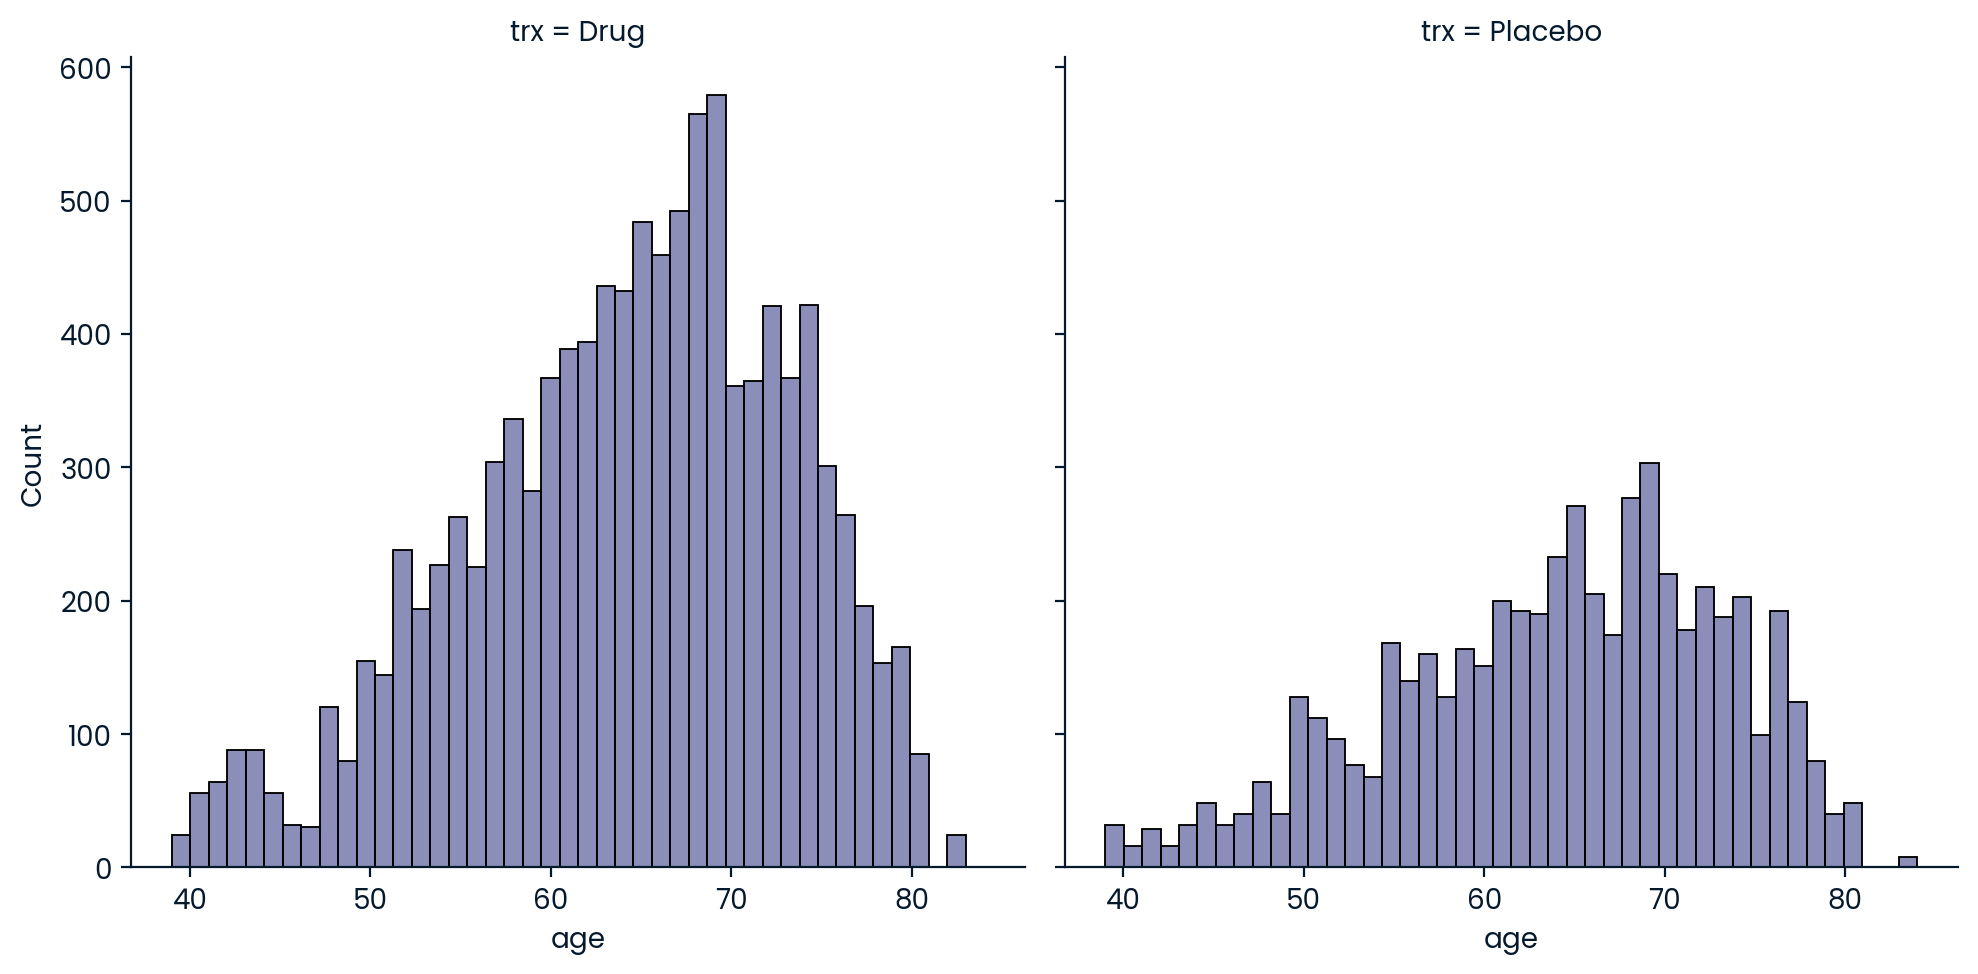

59.880435945566205
[15.  10.   5.   2.5  1. ]
[0.576 0.656 0.787 0.918 1.092]
35.074579937485396
[15.  10.   5.   2.5  1. ]
[0.576 0.656 0.786 0.917 1.091]


In [48]:
#Plotting histograms of the ages of each group to look for normality
sns.displot(data= drug_safety, x = 'age', col = 'trx', kind = 'hist')
plt.show()

#Performing Anderson-Darling test to test for normality of the age distributions across both groups
alpha = 0.05
from scipy.stats import anderson
drug_result  = anderson(x = drug_safety[drug_safety['trx'] == 'Drug']['age'], 
                        dist = 'norm')

placebo_result = anderson(x = drug_safety[drug_safety['trx'] == 'Placebo']['age'], 
                         dist = 'norm')

print(drug_result.statistic)
print(drug_result.significance_level)
print(drug_result.critical_values)

print(placebo_result.statistic)
print(placebo_result.significance_level)
print(placebo_result.critical_values)

In [49]:
#Set significance level
alpha= 0.05

#Perform a Mann Whitney U test
from scipy.stats import mannwhitneyu

u_stat, age_group_effects_p_value = mannwhitneyu(drug_safety[drug_safety['trx'] == 'Drug']['age'],
                                                drug_safety[drug_safety['trx'] == 'Placebo']['age'])

print(age_group_effects_p_value)

if alpha > age_group_effects_p_value:
    print('There is a significant difference between the ages of the Drug and Placebo groups')
else:
    print('There is no significant difference between the ages of the Drug and Placebo groups')

0.25696267004066287
There is no significant difference between the ages of the Drug and Placebo groups
